# Project Group - 21

Members: Naomi Cornelissen, Tom Bruinink, Sam Buisman, Bart van Heijningen, Klaas Molendijk

Student numbers: 5105765, 6075673, 5957915, 6088015, 6101399

# Research Objective


Background information:
Trains are generally seen as an environmental friendly mode of transport. The European Union recently announced a plan to improve the railway network in Europe in order to reduce CO2 emissions . The trend of investing in railway transport begs the question whether those investments are effective. Because there is often a great amount of money involved in those investments, this research takes a deeper dive into the relationship between investments in the rail network for passengers and the usage of that train network. The goal is to create a visual overview of that relationship. The infrastructure investments are measured relative to the gross domestic product (GDP) of a country. 
Research question:
What is the influence of a country’s investments in railway passenger transport on train travel?
Datasets:
1.	Amount of passenger-kilometres per country (2000-2020)
https://data.oecd.org/transport/passenger-transport.htm#indicator-chart 
2.	GDP (per capita) per country (2000-2020) https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators# https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=table
3.	Investments in railway passenger transport per country (2000-2020)
https://data.oecd.org/transport/infrastructure-investment.htm#indicator-chart


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

# Data Pipeline

# Research

### Data preparation
In the following code, the data is being prepared and standardized into a consistent format to facilitate computations. A timeframe spanning from 2000 to 2020 is selected, ensuring sufficient data availability across various datasets and encompassing a substantial 20-year period. To maintain data integrity, countries lacking complete data across all datasets throughout this timeframe are excluded. As a result, 15 countries from three different continents are included in the analysis

In [15]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [16]:
# Import data
prepare_passenger_data = pd.read_csv("passenger_data.csv")
prepare_infrastructure_train_data = pd.read_csv("InfrastructureInvestments_train_data.csv")
prepare_infrastructure_road_data = pd.read_csv("InfrastructureInvestments_road_data.csv")
prepare_population_data = pd.read_csv("population_data.csv")
gdp_data = pd.read_csv("GDP_data.csv")
gdp_per_capita_data = pd.read_csv("GDP_per_capita_data.csv")

# Choose the timeframe you want to consider
start_timeframe = 2000
end_timeframe = 2020

In [17]:
# Prepare data

num_of_countries = gdp_data.shape[0]
num_of_columns = gdp_data.shape[1]

# Make new dataframes in same format as gdp_data and gdp_per_capita_data
passenger_data = pd.DataFrame(columns=gdp_data.columns)
infrastructure_train_data = pd.DataFrame(columns=gdp_data.columns)
infrastructure_road_data = pd.DataFrame(columns=gdp_data.columns)
population_data = pd.DataFrame(columns=gdp_data.columns)

# Initialize dataframe
for i in range(num_of_countries):
    passenger_data.loc[i] = ['..' for _ in range(num_of_columns)]
    infrastructure_train_data.loc[i] = ['..' for _ in range(num_of_columns)]
    infrastructure_road_data.loc[i] = ['..' for _ in range(num_of_columns)]
    population_data.loc[i] = ['..' for _ in range(num_of_columns)]

# Every row corresponds to data of a country
for i in range(num_of_countries):
    passenger_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    infrastructure_train_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    infrastructure_road_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]
    population_data.loc[i, "Country"] = gdp_data.loc[i, "Country"]

# Fill dataframes with values if they exist
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    for year in gdp_data.columns[1:]:
        if ((prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))).any():
            if np.isnan(prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]) :
                continue
            else:
                passenger_data.loc[country_index,year] = prepare_passenger_data["Value"].iloc[prepare_passenger_data.loc[(prepare_passenger_data["LOCATION"] == country) & 
                                      (prepare_passenger_data["TIME"] == int(year))].index[0]]
                
        if ((prepare_infrastructure_train_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_train_data["TIME"] == int(year))).any():
            if np.isnan(prepare_infrastructure_train_data["Value"].iloc[prepare_infrastructure_train_data.loc[(prepare_infrastructure_train_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_train_data["TIME"] == int(year))].index[0]]):
                continue
            else:
                infrastructure_train_data.loc[country_index,year] = prepare_infrastructure_train_data["Value"].iloc[prepare_infrastructure_train_data.loc[(prepare_infrastructure_train_data["LOCATION"] == country) & 
                                        (prepare_infrastructure_train_data["TIME"] == int(year))].index[0]]
        
        if ((prepare_infrastructure_road_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_road_data["TIME"] == int(year))).any():
            if np.isnan(prepare_infrastructure_road_data["Value"].iloc[prepare_infrastructure_road_data.loc[(prepare_infrastructure_road_data["LOCATION"] == country) & 
                                      (prepare_infrastructure_road_data["TIME"] == int(year))].index[0]]):
                continue
            else:
                infrastructure_road_data.loc[country_index,year] = prepare_infrastructure_road_data["Value"].iloc[prepare_infrastructure_road_data.loc[(prepare_infrastructure_road_data["LOCATION"] == country) & 
                                        (prepare_infrastructure_road_data["TIME"] == int(year))].index[0]]

        if ((prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))).any():
            if np.isnan(prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                      (prepare_population_data["Year"] == int(year))].index[0]]):
                continue
            else:
                population_data.loc[country_index,year] = prepare_population_data["Population"].iloc[prepare_population_data.loc[(prepare_population_data["Code"] == country) & 
                                        (prepare_population_data["Year"] == int(year))].index[0]]
                
passenger_data.head(10)

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ALB,4955.0,5233.0,3721.0,4924.0,5183.0,5299.0,5370.0,6065.0,6495.0,...,7980.0,7637.0,8650.0,..,..,..,..,..,..,..
2,DZA,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,ASM,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,AND,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,AGO,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
6,ATG,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
7,ARG,22854.82871,22203.4949,22777.99199,24990.06492,26139.84115,25464.11758,25286.63395,24807.91882,28189.80285,...,43220.01256,44054.44365,42920.52886,43361.32563,44538.45908,46838.665,48784.35137,..,..,..
8,ARM,..,..,1626.0,1643.0,1421.0,1437.0,1678.0,1813.0,1959.0,...,..,..,..,..,..,..,..,..,..,..
9,ABW,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [18]:
# Create empty dataframe to check on what timeframe there is data per country
data_empty = {'Country': [], 'Timeframe passenger': [], 'Timeframe infrastructure': []}
country_timeframe = pd.DataFrame(data_empty)

# Determine timeframe per country for passenger and infrastructure data
for country in gdp_data["Country"]:
    country_index = gdp_data.loc[gdp_data["Country"] == country].index[0]

    passenger_start = 0
    passenger_stop = 0
    passenger_count = 0

    infrastructure_start = 0
    infrastructure_stop = 0
    infrastructure_count = 0
    
    for year in gdp_data.columns[1:]:
        if passenger_data.loc[country_index,year] != "..":
            if passenger_start == 0:
                passenger_start = int(year)
            passenger_stop = int(year)
            passenger_count += 1

        if infrastructure_train_data.loc[country_index,year] != ".." and infrastructure_road_data.loc[country_index,year] != "..":
            if infrastructure_start == 0:
                infrastructure_start = int(year)
            infrastructure_stop = int(year)
            infrastructure_count += 1

    # Continue if there is no data for a country or there is data missing in between
    if (passenger_stop - passenger_start + 1 != passenger_count or
        infrastructure_stop - infrastructure_start + 1 != infrastructure_count):
        continue

    else:
        new_row = {'Country': country, 'Timeframe passenger': "{}-{}".format(passenger_start,passenger_stop), 'Timeframe infrastructure': "{}-{}".format(infrastructure_start,infrastructure_stop)}
        country_timeframe = country_timeframe.append(new_row, ignore_index=True)

# Create empty list for countries that have data for entire timeframe
feasible_countries = []

for country in country_timeframe["Country"]:
    country_index = country_timeframe.loc[country_timeframe["Country"] == country].index[0]

    years_timeframe_passenger = country_timeframe["Timeframe passenger"].iloc[country_index].split('-')
    years_timeframe_infrastructure = country_timeframe["Timeframe infrastructure"].iloc[country_index].split('-')

    start_year_passenger = int(years_timeframe_passenger[0])
    end_year_passenger = int(years_timeframe_passenger[1])

    start_year_infrastructure = int(years_timeframe_infrastructure[0])
    end_year_infrastructure = int(years_timeframe_infrastructure[1])

    # Add countries to feasible_countries if data is available on entire timeframe for both passengers and infrastructure
    if (max(start_year_passenger,start_year_infrastructure) <= start_timeframe) & (min(end_year_passenger,end_year_infrastructure) >= end_timeframe):
        feasible_countries.append(country)

# Drop all years from dataframe that are not in timeframe
for year in gdp_data.columns[1:]:
    if int(year) < start_timeframe or int(year) > end_timeframe:
        gdp_data = gdp_data.drop(year, axis=1)
        gdp_per_capita_data = gdp_per_capita_data.drop(year, axis=1)
        passenger_data = passenger_data.drop(year, axis=1)
        population_data = population_data.drop(year, axis=1)
        infrastructure_train_data = infrastructure_train_data.drop(year, axis=1)
        infrastructure_road_data = infrastructure_road_data.drop(year, axis=1)

# Drop all countries from dataframe that are not in feasible countries
gdp_data = gdp_data[gdp_data['Country'].isin(feasible_countries)]
gdp_per_capita_data = gdp_per_capita_data[gdp_per_capita_data['Country'].isin(feasible_countries)]
passenger_data = passenger_data[passenger_data['Country'].isin(feasible_countries)]
population_data = population_data[population_data['Country'].isin(feasible_countries)]
infrastructure_train_data = infrastructure_train_data[infrastructure_train_data['Country'].isin(feasible_countries)]
infrastructure_road_data = infrastructure_road_data[infrastructure_road_data['Country'].isin(feasible_countries)]

In [19]:
# Set countries as index to make plotting easier
gdp_data.set_index('Country', inplace=True)
gdp_data = gdp_data.applymap(lambda x: '{:.0f}'.format(float(x)))  # Convert large numbers (e-powers) to normal numbers
gdp_per_capita_data.set_index('Country', inplace=True)
passenger_data.set_index('Country', inplace=True)
population_data.set_index('Country', inplace=True)
infrastructure_train_data.set_index('Country', inplace=True)
infrastructure_road_data.set_index('Country', inplace=True)

gdp_data.to_csv("gdp_new.csv",index=True)
gdp_per_capita_data.to_csv("gdp_per_capita_new.csv",index=True)
passenger_data.to_csv('passenger_new.csv', index=True)
population_data.to_csv("population_new.csv",index=True)
infrastructure_train_data.to_csv("infrastructure_train_new.csv",index=True)
infrastructure_road_data.to_csv("infrastructure_road_new.csv",index=True)

passenger_data.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
AUS,256806.0842,254426.9018,260519.1863,267143.3819,279135.625,279904.6174,275480.5284,278956.6124,280755.5115,279946.6832,...,284788.7982,287595.2007,293369.3022,297943.899,301444.6386,303530.0108,305705.1561,308067.1705,306963.4189,282439.4253
AZE,9153.0,9442.0,9603.0,9861.0,10279.0,10892.0,11786.0,12893.0,14041.0,15291.0,...,18264.0,20034.0,21880.0,22992.0,23825.0,24429.0,24886.0,25276.0,25950.0,16974.0
CZE,73291.0,74078.0,74958.0,76809.0,76086.0,77248.0,79131.0,81059.0,81749.0,81784.0,...,74757.0,73275.0,73676.0,76270.0,79700.9,82512.1,85504.8,88921.4,91726.0,74380.0
FIN,63400.0,64700.0,66000.0,67260.0,68545.0,69450.0,69995.0,71325.0,70940.0,71870.0,...,73030.0,72810.0,72655.0,73060.0,73835.0,65262.0,74800.0,74800.0,74700.0,70900.0
FRA,747054.0,770918.0,777226.0,779163.0,777323.0,767290.0,765879.0,771178.0,756610.0,757177.0,...,764529.0,821372.0,827658.0,839737.0,851217.0,865017.0,873037.0,871780.0,867852.0,718056.0
DEU,900300.0,921300.0,930500.0,925200.0,951493.0,939389.0,945052.0,947807.0,950882.0,959694.0,...,972357.0,972319.0,980246.0,995190.0,1008771.0,1027755.0,977430.0,978702.0,981452.0,854931.0
HUN,64622.0,64506.0,64702.0,66122.0,67529.0,66638.0,69630.0,70447.0,70984.0,70477.0,...,68510.0,68661.0,68788.0,70162.677,72220.7766,74976.9021,78745.268,82606.9168,85756.2439,77150.225
ITA,807481.0,813276.0,808678.0,809307.0,815820.0,777968.0,779304.0,779713.0,778797.0,821618.0,...,767772.0,680180.0,722138.0,745726.0,778858.0,806855.0,847598.0,825494.0,836722.0,546933.0
MKD,6519.0,6337.0,6591.0,6784.0,6022.0,5722.0,5387.0,5518.0,6000.0,6009.0,...,7530.0,7110.0,7944.0,9243.0,9263.0,9261.0,11499.0,11698.0,11731.0,10352.10578


### Relative investment in railway infrastructure
In the figure presented below, we display the relative investment in railway infrastructure in relation to a country's GDP spanning the period from 2000 to 2020. Notably, these investments typically range from 0% to 0.6% of the GDP across various countries. Furthermore, the data reveals significant fluctuations over time, indicating a lack of consistent patterns. There is no clear difference between nations that consistently invest heavily in railway projects and those that do not.

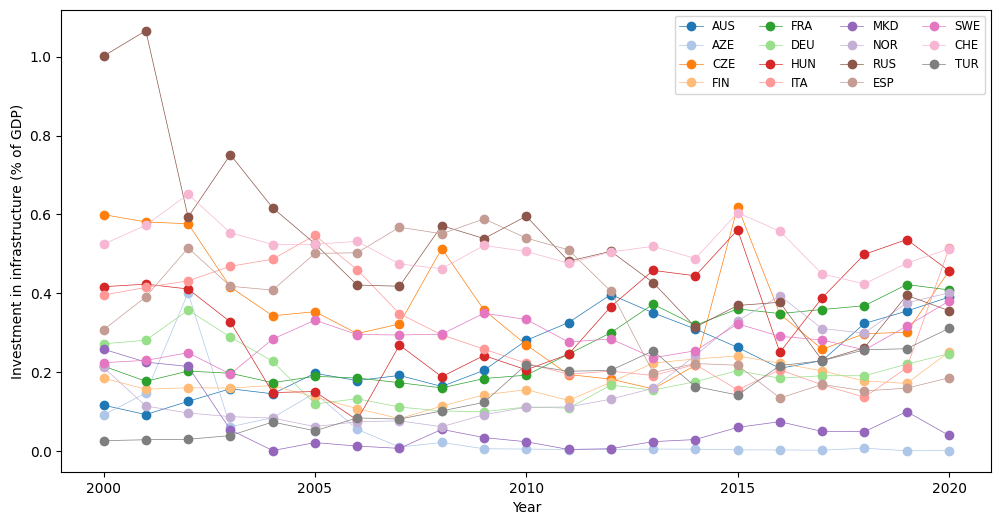

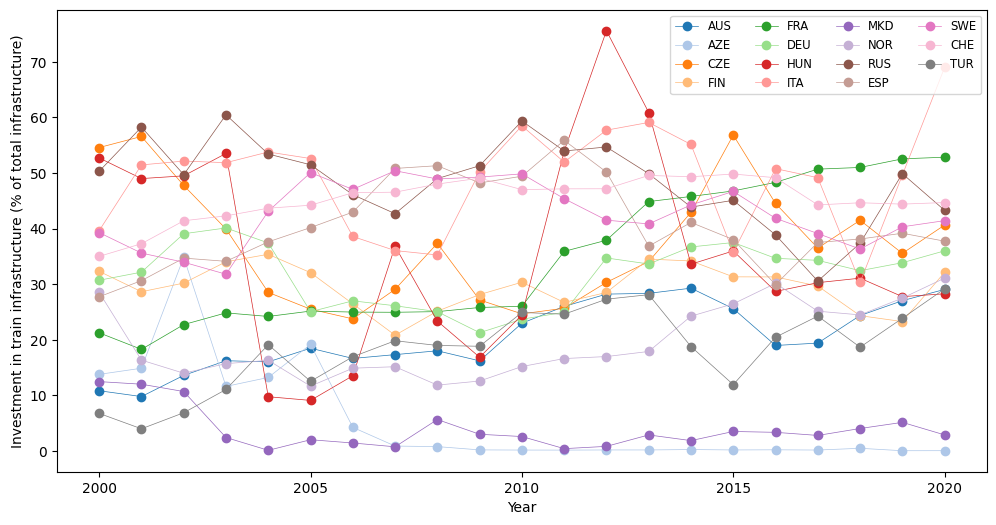

In [20]:
infrastructure_train_data = infrastructure_train_data.astype(float)
gdp_data = gdp_data.astype(float)

# Determine percentage of GDP that is invested in railway infrastructure
infrastructure_gdp = infrastructure_train_data / gdp_data * 100
infrastructure_train_to_total = infrastructure_train_data / (infrastructure_train_data + infrastructure_road_data) * 100

# Create figure
plt.figure(figsize=(12, 6))

# Plot every country
for i, (index, row) in enumerate(infrastructure_gdp.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=f'{index}', linewidth=0.5, color=plt.cm.tab20(i))

# Adjust years on x-axis for visibility
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('Investment in infrastructure (% of GDP)')

plt.legend(loc='upper right', fontsize='small', ncol = 4)
plt.show()



# Create figure
plt.figure(figsize=(12, 6))

# Plot every country
for i, (index, row) in enumerate(infrastructure_train_to_total.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=f'{index}', linewidth=0.5, color=plt.cm.tab20(i))

# Adjust years on x-axis for visibility
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('Investment in train infrastructure (% of total infrastructure)')

plt.legend(loc='upper right', fontsize='small', ncol = 4)
plt.show()

### Travel distance per person
In the figure below, we show the railway distance traveled per person for each country from 2000 to 2020. Distances range widely, from 1500 to 14000 kilometers. The data remains consistent over time, revealing three distinct groups: countries with low travel (under 5000 km), moderate travel (6000 to 9000 km), and high travel (over 10000 km). There is a significant decrease in 2020 for all countries, likely due to Covid-19 restrictions.

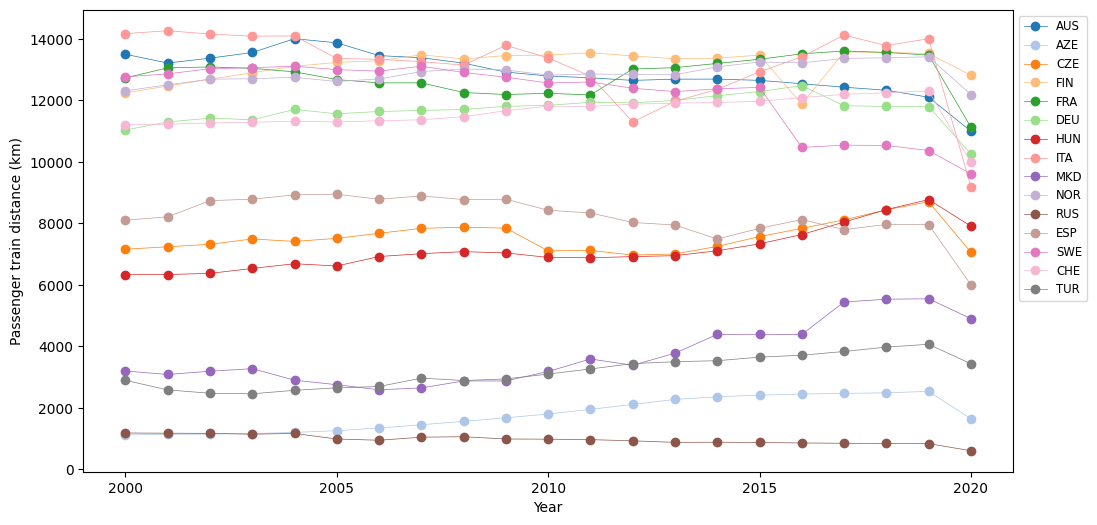

In [21]:
passenger_data = passenger_data.astype(float)
population_data = population_data.astype(float)

# Determine amount of kilometers travelled per passenger
# Note that passenger data is the total amount of kilometers travelled in millions
km_per_passenger = passenger_data / population_data * 1000000

# Create figure
plt.figure(figsize=(12, 6))

# Plot every country
for i, (index, row) in enumerate(km_per_passenger.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=f'{index}', linewidth=0.5, color=plt.cm.tab20(i))

# Adjust years on x-axis for visibility
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

plt.xlabel('Year')
plt.ylabel('Passenger train distance (km)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()